<a href="https://colab.research.google.com/github/bommojuvishu/pycoderpricetrend/blob/main/pycoder_pricetrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import io
# df = pd.read_csv(io.BytesIO(uploaded['inputdata.csv']))
periodinput = 120
TODAY = "2022-08-01"
TODAY = (dt.datetime.today()+ dt.timedelta(1)).strftime('%Y-%m-%d') 
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')
df = yf.download('BAJAJ-AUTO' +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)

df.columns=[ 'open', 'high', 'low', 'close', 'adj close','volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume
0,4018.000000,4055.000000,3999.000000,4002.050049,4002.050049,377717
1,4004.649902,4070.600098,3993.449951,4057.050049,4057.050049,371547
2,4065.000000,4091.000000,4045.250000,4054.500000,4054.500000,280291
3,4054.500000,4073.949951,3998.300049,4021.149902,4021.149902,372987
4,4014.000000,4030.000000,3917.000000,3925.600098,3925.600098,882407
5,3933.000000,3960.000000,3845.149902,3883.850098,3883.850098,514997
6,3884.000000,3913.699951,3847.000000,3858.250000,3858.250000,423758
7,3899.000000,3952.250000,3878.000000,3914.449951,3914.449951,412805
8,3919.949951,3988.250000,3915.000000,3973.300049,3973.300049,459482
9,3973.300049,4005.000000,3941.350098,3996.199951,3996.199951,398168


In [ ]:
dfpl = df
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.show()

[*********************100%***********************]  1 of 1 completed
59
slope -0.4643239652963871


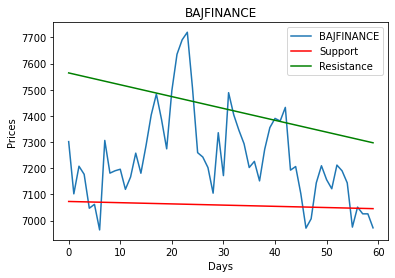

In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot


periodinput = 90
TODAY = "2022-08-01"
TODAY = (dt.datetime.today()+ dt.timedelta(1)).strftime('%Y-%m-%d') 
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')
name ="BAJFINANCE"
df = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
# print(df)
df.columns=[ 'open', 'high', 'low', 'close', 'adj close','volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)
# ---------------------------------------

backcandles= 60
wind = 5

candleid = len(df) -1
print(candleid)

maxim = np.array([])
minim = np.array([])
xxmin = np.array([])
xxmax = np.array([])
for i in range(0, candleid+1, wind):
    minim = np.append(minim, df.low.iloc[i:i+wind].min())
    xxmin = np.append(xxmin, df.low.iloc[i:i+wind].idxmin())
for i in range(0, candleid+1, wind):
    maxim = np.append(maxim, df.high.loc[i:i+wind].max())
    xxmax = np.append(xxmax, df.high.iloc[i:i+wind].idxmax())
slmin, intercmin = np.polyfit(xxmin, minim,1)
slmax, intercmax = np.polyfit(xxmax, maxim,1)
print("slope",slmin)
# dfpl = df
# fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
#                 open=dfpl['open'],
#                 high=dfpl['high'],
#                 low=dfpl['low'],
#                 close=dfpl['close'])])
# fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + intercmin, mode='lines', name='min slope'))
# fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + intercmax, mode='lines', name='max slope'))


plt.title(name)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(df['close'], label=name)
plt.plot(slmin*df.index.values + intercmin, label='Support', c='r')
plt.plot(slmax*df.index.values + intercmax, label='Resistance', c='g')
plt.legend()
plt.show()
